In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tkinter as tk
from tkinter import simpledialog
import json
from pandas.io.json import json_normalize
import seaborn as sns
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
from matplotlib.patches import Arc

from functools import reduce

In [2]:
#df = pd.read_excel("Dublin_v_Kerry_cleaned_11mins.xlsx")
#df = pd.read_excel("Dublin_v_Mayo_SF_FullGame.xlsx")
#df = pd.read_excel("Mayo_v_Dublin_SF_FullGame.xlsx")
#df = pd.read_excel("Tyrone_v_Mayo_F_FullGame.xlsx")
df = pd.read_excel("Galway_v_Kerry_F_Full.xlsx")
#df = pd.read_excel("Tyrone_v_Kerry_SF_FullGame.xlsx")
#df = pd.read_excel("Kerry_v_Tyrone_SF_FullGame.xlsx")
#df = pd.read_excel("Monaghan_v_Tyrone_UF_FullGame.xlsx")
#df = pd.read_excel("Tyrone_v_Monaghan_UF_FullGame.xlsx")
#df = pd.read_excel("Dublin_v_Meath_LSF_cleaned_FullGame.xlsx")
#df = pd.read_excel("Meath_v_Dublin_LSF_cleaned_FullGame.xlsx")

In [3]:
df.head()

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter
0,0,0,2,fouled,70.777982,30.176372,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN
1,1,1,2,successful pass,77.318583,35.489241,111.493222,38.809784,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NaN,1,NaN,2,NaN
2,2,2,2,successful pass,111.329707,38.809784,106.587771,40.138001,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NaN,1,NaN,2,NaN
3,3,3,2,fouled,107.405346,39.971974,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN
4,4,4,2,free,108.059406,36.983485,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN


In [4]:
df = df.drop(df.columns[[0]], axis=1)

In [5]:
df.head()

,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter
0,0,2,fouled,70.777982,30.176372,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN
1,1,2,successful pass,77.318583,35.489241,111.493222,38.809784,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NaN,1,NaN,2,NaN
2,2,2,successful pass,111.329707,38.809784,106.587771,40.138001,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NaN,1,NaN,2,NaN
3,3,2,fouled,107.405346,39.971974,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN
4,4,2,free,108.059406,36.983485,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN


In [6]:
df['Player_Name'] = 'NA'
df['Receiver_Name'] = 'NA'

In [7]:
df = df[['Event_No', 'Minute', 'Action', 'x1', 'y1', 'x2', 'y2','location', 'pass_end_location', 'Player', 'Player_Name', 'Receiver', 'Receiver_Name', 'Minute', 'Outcome']]

In [8]:
df.head()

,Event_No,Minute,Action,x1,y1,x2,y2,location,pass_end_location,Player,Player_Name,Receiver,Receiver_Name,Minute,Outcome
0,0,1,fouled,70.777982,30.176372,NaN,NaN,NaN,NaN,NaN,NA,NaN,NA,1,NaN
1,1,1,successful pass,77.318583,35.489241,111.493222,38.809784,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NA,NaN,NA,1,NaN
2,2,1,successful pass,111.329707,38.809784,106.587771,40.138001,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NA,NaN,NA,1,NaN
3,3,1,fouled,107.405346,39.971974,NaN,NaN,NaN,NaN,NaN,NA,NaN,NA,1,NaN
4,4,1,free,108.059406,36.983485,NaN,NaN,NaN,NaN,NaN,NA,NaN,NA,1,NaN


# Label Point Function

In [9]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']), size=10, color = "black")

#label_point(df.x, df.y, df.val, ax)

#draw()

In [10]:
final_third1 = 48
final_third2 = 144 - 48

In [11]:
kd = df[(df['Action'].str.contains('pass'))]

In [12]:
kd = kd[(kd['x1'] >= final_third2) | (kd['x2'] >= final_third2)]

In [13]:
kd = kd[['Action', 'x1', 'y1', 'x2', 'y2']]

In [14]:
kd

,Action,x1,y1,x2,y2
1,successful pass,77.318583,35.489241,111.493222,38.809784
2,successful pass,111.329707,38.809784,106.587771,40.138001
11,successful pass,86.475424,11.415303,112.964857,10.419140
12,successful pass,117.870307,7.264624,97.757960,16.728172
13,unsuccessful pass,102.172866,20.546797,125.064968,46.945114
...,...,...,...,...,...
344,successful pass,98.258725,50.684461,95.969515,58.155683
346,successful pass,99.239815,25.614360,101.201995,16.648894
362,successful pass,98.912785,2.868640,84.686979,13.992460
364,successful pass,89.919459,51.348569,96.296545,77.912914


In [15]:
team1 = len(kd)

# Team 2

In [16]:
#kf = pd.read_excel("Mayo_v_Dublin_SF_FullGame.xlsx")
#kf = pd.read_excel("Mayo_v_Dublin_SF_FullGame.xlsx")
kf = pd.read_excel("Kerry_v_Galway_F_Full.xlsx")
#kf = pd.read_excel("Mayo_v_Tyrone_F_FullGame.xlsx")
#kf = pd.read_excel("Tyrone_v_Kerry_SF_FullGame.xlsx")
#kf = pd.read_excel("Kerry_v_Tyrone_SF_FullGame.xlsx")
#kf = pd.read_excel("Monaghan_v_Tyrone_UF_FullGame.xlsx")
#kf = pd.read_excel("Tyrone_v_Monaghan_UF_FullGame.xlsx")
#kf = pd.read_excel("Dublin_v_Meath_LSF_cleaned_FullGame.xlsx")
#kf = pd.read_excel("Meath_v_Dublin_LSF_cleaned_FullGame.xlsx")
#kf1 = pd.read_excel("Dublin_v_Meath_cleaned_2ndHalf.xlsx")

In [17]:
data = kf

In [18]:
data[data['Action'].str.contains('point')]

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter
95,95,95,1,point,103.480986,57.404825,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN
108,108,108,1,point,109.040496,52.091956,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN
203,202,202,2,point,124.584643,18.973274,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN
220,219,219,2,point,113.465622,40.390777,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN
236,235,235,2,point,134.068514,52.676787,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN
239,238,238,2,point,105.780416,39.560641,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN
259,258,258,2,point,123.603553,14.490541,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN
289,288,288,2,point,108.560171,37.568316,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN
316,315,315,2,point,119.025132,34.745854,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN
380,379,379,2,point,143.061840,51.680624,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN


In [19]:
data['mx'] = 72.5

data['my'] = 44

data['x1'] = 2*data['mx'] - data['x1']
data['y1'] = 2*data['my'] - data['y1']
data['x2'] = 2*data['mx'] - data['x2']
data['y2'] = 2*data['my'] - data['y2']


In [20]:
data[data['Action'].str.contains('point')]

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter,mx,my
95,95,95,1,point,41.519014,30.595175,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,72.5,44
108,108,108,1,point,35.959504,35.908044,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,72.5,44
203,202,202,2,point,20.415357,69.026726,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,72.5,44
220,219,219,2,point,31.534378,47.609223,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,72.5,44
236,235,235,2,point,10.931486,35.323213,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,72.5,44
239,238,238,2,point,39.219584,48.439359,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,72.5,44
259,258,258,2,point,21.396447,73.509459,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,72.5,44
289,288,288,2,point,36.439829,50.431684,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,72.5,44
316,315,315,2,point,25.974868,53.254146,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,72.5,44
380,379,379,2,point,1.938160,36.319376,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,72.5,44


In [21]:
data = data[data['Action'].str.contains('pass')]

In [22]:
data = data[(data['x1'] <= final_third1) | (data['x2'] <= final_third1)]

data = data[['Action', 'x1', 'y1', 'x2', 'y2']]

data

,Action,x1,y1,x2,y2
7,unsuccessful pass,52.638035,15.154650,2.765955,42.881185
13,successful pass,23.532362,13.660405,10.451161,13.826432
14,successful pass,23.041817,9.011645,28.764843,8.513563
17,successful pass,75.203108,57.989656,45.770405,73.430181
18,successful pass,47.732585,70.109638,49.694765,64.298687
...,...,...,...,...,...
379,successful pass,26.955958,14.071738,7.497671,20.214742
394,successful pass,67.180652,32.832806,42.326370,35.323213
395,successful pass,30.062743,31.670616,9.950396,27.685964
403,successful pass,41.672310,26.523774,21.886992,26.025693


In [23]:
team2 = len(data)

# Field Tilt

In [24]:
field_pct1 = (team1 / (team1 + team2)) * 100
field_pct3 = (team1 / (team1 + team2))

In [25]:
field_pct1

45.23809523809524

In [26]:
field_pct1 = int(round(field_pct1, 0))
field_pct3 = "{:.0%}".format(field_pct3)

In [27]:
field_pct1

45

In [28]:
field_pct2 = (team2 / (team1 + team2)) * 100
field_pct4 = (team2 / (team1 + team2))

In [29]:
field_pct2

54.761904761904766

In [30]:
field_pct2 = int(round(field_pct2, 0))
field_pct4 = "{:.0%}".format(field_pct4)

In [31]:
field_pct2

55

# Graph

In [32]:
d = {'col1': field_pct1, 'col2': [0], 'col3': field_pct2}
g = pd.DataFrame(data=d)

In [33]:
g

,col1,col2,col3
0,45,0,55


In [34]:
def draw_map():

    fig=plt.figure()
    fig.set_size_inches(20, 10)
    ax=fig.add_subplot(1,1,1)
    
    #ax.text(11, 44, 'Monaghan', style='italic', fontsize=25, color='white', bbox={
       # 'facecolor': 'black', 'alpha': 1, 'pad': 10})
    #ax.text(11, 38, field_pct1, style='italic', fontsize=25, color='white', bbox={
      #  'facecolor': 'black', 'alpha': 1, 'pad': 10})
    #ax.text(119, 44, 'Tyrone', style='italic', fontsize=25, color='white', bbox={
     #   'facecolor': 'black', 'alpha': 1, 'pad': 10})
    #ax.text(129, 38, field_pct2, style='italic', fontsize=25, color='white', bbox={
       # 'facecolor': 'black', 'alpha': 1, 'pad': 10})
    plt.text(0.25,0.55,'Galway',horizontalalignment='center', fontfamily = 'Fantasy', 
     verticalalignment='center', transform = ax.transAxes, fontsize=30, color='white', bbox={ 'facecolor': 'brown', 'alpha': 1, 'pad': 10})
    plt.text(0.75,0.55,'Kerry',horizontalalignment='center',
     verticalalignment='center', transform = ax.transAxes, fontsize=30, color='yellow', bbox={ 'facecolor': 'green', 'alpha': 1, 'pad': 10})
    plt.text(0.25,0.45,field_pct3,horizontalalignment='center',
     verticalalignment='center', transform = ax.transAxes, fontsize=25, color='white', bbox={ 'facecolor': 'brown', 'alpha': 1, 'pad': 10})
    plt.text(0.75,0.45,field_pct4,horizontalalignment='center',
     verticalalignment='center', transform = ax.transAxes, fontsize=25, color='yellow', bbox={ 'facecolor': 'green', 'alpha': 1, 'pad': 10})
    
    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,88], color="black")
    plt.plot([0,145],[88,88], color="black")
    plt.plot([145,145],[88,0], color="black")
    plt.plot([145,0],[0,0], color="black")

    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="black")

            #goals#
    ly4 = [40.75,40.75,47.25,47.25]
    lx4 = [145,145.2,145.2,145]
    plt.plot(lx4,ly4,color="black")

    ly5 = [40.75,40.75,47.25,47.25]
    lx5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color="black")

           #6 yard boxes#
    ly6 = [37,37,51,51]
    lx6 = [145,140.5,140.5,145]
    plt.plot(lx6,ly6,color="black")

    ly7 = [37,37,51,51]
    lx7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color="black")
    
            #large rectangle
    ly88 = [34.5,34.5,53.5,53.5]
    lx88 = [145,131,131,145]
    plt.plot(lx88,ly88,color="black",zorder=5)

    ly87 = [34.5,34.5,53.5,53.5]
    lx87 = [0,14,14,0]
    plt.plot(lx87,ly87,color="black",zorder=5)
        
        #halfway small line
    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="black")
        
        #peno lines
    ly90 = [43.5,44.5] 
    lx90 = [11,11]
    plt.plot(lx90,ly90,color="black")
        
    ly89 = [43.5,44.5] 
    lx89 = [136,136]
    plt.plot(lx89,ly89,color="black")
        
        #14 yard line across the pitch
    ly94 = [0,88] 
    lx94 = [14,14]
    plt.plot(lx94,ly94,color="black")
        
    ly99 = [0,88] 
    lx99 = [131,131]
    plt.plot(lx99,ly99,color="black")
       
    #21 yard line
    ly98 = [0,88] 
    lx98 = [124,124]
    plt.plot(lx98,ly98,color="black")
        
    ly93 = [0,88] 
    lx93 = [21,21]
    plt.plot(lx93,ly93,color="black")
     
    #45 metre line
    ly96 = [0,88] 
    lx96 = [100,100]
    plt.plot(lx96,ly96,color="black")
        
    ly91 = [0,88] 
    lx91 = [45,45]
    plt.plot(lx91,ly91,color="black")
        
     #65 yard line
    ly95 = [0,88] 
    lx95 = [80,80]
    plt.plot(lx95,ly95,color="black")
        
    ly92 = [0,88] 
    lx92 = [65,65]
    plt.plot(lx92,ly92,color="black")
    
   # ly921 = [124,30] 
 #   lx921 = [0,30]
  #  plt.plot(lx921,color="black")
    

#Prepare Arcs
    leftArc = Arc((21,44.5),height=26,width=26,angle=0,theta1=270,theta2=90,color="black")
    rightArc = Arc((124,44.5),height=26,width=26,angle=0,theta1=90,theta2=270,color="black")

#Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    


#Tidy Axes
    plt.axis('off')
    
    #fig, ax = plt.subplots()
# the size of A4 paper
    
    M = 1
    N = 3
    data = g
# sns.heatmap(data)
    c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.8, cmap=plt.cm.get_cmap('Purples'))
             # cmap=sns.color_palette("rocket", as_cmap=True))
    fig.colorbar(c, ax=ax)
  #  sns.heatmap(div)
    #fig.set_size_inches(11.7, 8.27)
    #sns.kdeplot(data["x1"],data["y1"], shade=True, n_levels=50)
    #sns.set(rc={'figure.figsize':(11.7,8.27)})
   # plt.ylim(0, 88)
    #plt.xlim(0, 145)

   # for i in range(len(data)):
        #color="red" if "short" in data.iloc[i].Action else "blue"
       # if "pass" in pass_data.iloc[i].Action
        #plt.plot([int(data["x1"].iloc[i])],
         #        [int(data["y1"].iloc[i])], 
          #       color = color,
           #      )
    
        #plt.plot(int(data["x1"].iloc[i]), int(data["y1"].iloc[i]),"o", color = "yellow", markersize=15)
        
       # label_point(data.x1, data.y1, data.Player_Name, ax)
    #plt.plot(int(data["Xstart"][i]),int(data["Ystart"][i]),"o", color="green")
    
    #ax.set_title('Attacking >>>>>>>')

    #Display Pitch
    plt.show()
    
    fig.savefig('Gal_v_Ker_FieldTilt.pdf')

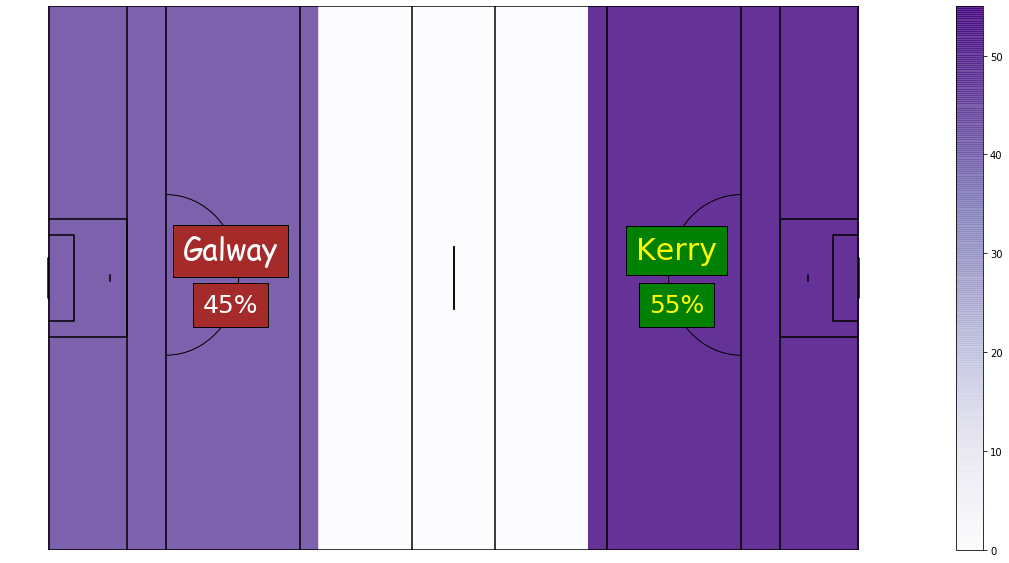

In [35]:
draw_map()

In [36]:
sq = [['Galway', field_pct1], ['Kerry', field_pct2]]
 
# Create the pandas DataFrame
sq1 = pd.DataFrame(sq, columns = ['Team', 'Field Tilt'])
 
# print dataframe.
sq1.to_excel('gal_ker_fieldtilt.xlsx')

In [37]:
sq1

,Team,Field Tilt
0,Galway,45
1,Kerry,55
